In [9]:
import pandas as pd
import seaborn as sns

In [32]:
df = pd.read_csv("Advertising.csv")

In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


1. correlation

<Axes: >

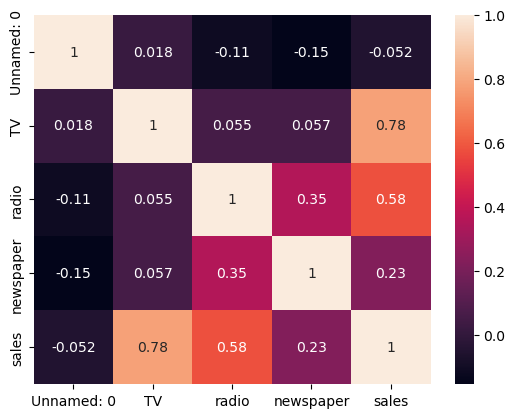

In [11]:
sns.heatmap(df.corr(), annot =True)

2. Variance inflation factor

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(3):
    vif.append(variance_inflation_factor(df.iloc[:,1:4], i))

In [17]:
pd.DataFrame({'vif': vif}, index=df.columns[1:4]).T

,TV,radio,newspaper
vif,2.486772,3.285462,3.055245


In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_regression

# Generate a synthetic dataset with multicollinearity
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=100)  # Introduce multicollinearity between columns 0 and 1

# Convert data to a pandas DataFrame
data = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
data['y'] = y

data.corr()

,X1,X2,X3,y
X1,1.000000,0.882948,-0.048636,0.148108
X2,0.882948,1.000000,-0.054696,0.165352
X3,-0.048636,-0.054696,1.000000,0.071536
y,0.148108,0.165352,0.071536,1.000000


3. condition number

In [46]:
import statsmodels.api as sm
X = df.drop(columns=["Unnamed: 0", "sales"]).values

condition_number = np.linalg.cond(X)

# Print the condition number
print("Condition Number:", condition_number)


Condition Number: 12.623136926075036


In [44]:
df = pd.read_csv("Advertising.csv")

X = df[['TV', 'radio', 'newspaper']]

# The sm.add_constant(X) is present in your code to ensure the intercept (𝛽0) is included in your regression model.
# This adds a column of ones to the predictors X, representing the constant term.

y= df['sales']

model= sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Wed, 29 Jan 2025   Prob (F-statistic):                   2.43e-171
Time:                        09:21:22   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# How to remove multicollinerarity

In [48]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_regression

# Generate a synthetic dataset with multicollinearity
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=100)  # Introduce multicollinearity between columns 0 and 1

# Convert data to a pandas DataFrame
data = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
data['y'] = y

data.corr()

,X1,X2,X3,y
X1,1.000000,0.882948,-0.048636,0.148108
X2,0.882948,1.000000,-0.054696,0.165352
X3,-0.048636,-0.054696,1.000000,0.071536
y,0.148108,0.165352,0.071536,1.000000


1. Removing one of the highly correlated variable

In [50]:
# Add a constant term to the predictor variables
data_with_constant_all = sm.add_constant(data[['X1', 'X2', 'X3']])
data_with_constant_reduced = sm.add_constant(data[['X1', 'X3']])

# Create and fit an OLS model using all three predictor variables
model_all = sm.OLS(data['y'], data_with_constant_all).fit()

# Print the summary for the model with all predictors
print("Regression summary for the model with all predictors:")
print(model_all.summary())

# Create and fit an OLS model using only X1 and X3 (removing the highly correlated variable X2)
model_reduced = sm.OLS(data['y'], data_with_constant_reduced).fit()

# Print the summary for the model with reduced predictors (X1 and X3)
print("\nRegression summary for the model with reduced predictors (X1 and X3):")
print(model_reduced.summary())

Regression summary for the model with all predictors:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.122
Date:                Wed, 29 Jan 2025   Prob (F-statistic):              0.344
Time:                        09:30:02   Log-Likelihood:                -581.96
No. Observations:                 100   AIC:                             1172.
Df Residuals:                      96   BIC:                             1182.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

# combine correlated matrix

In [55]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_regression

# Generate a synthetic dataset with multicollinearity
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=100)  # Introduce multicollinearity between columns 0 and 1

# Convert data to a pandas DataFrame
data = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
data['y'] = y

# Calculate correlation matrix
corr_matrix = data.corr()
print("Correlation matrix:\n", corr_matrix)

# Combine the correlated variables X1 and X2 by taking their average
data['X1_X2_combined'] = (data['X1'] + data['X2']) / 2

# Add a constant term to the predictor variables
data_with_constant_all = sm.add_constant(data[['X1', 'X2', 'X3']])
data_with_constant_combined = sm.add_constant(data[['X1_X2_combined', 'X3']])

# Create and fit an OLS model using all three predictor variables
model_all = sm.OLS(data['y'], data_with_constant_all).fit()

# Print the summary for the model with all predictors
print("Regression summary for the model with all predictors:")
print(model_all.summary())

# Create and fit an OLS model using the combined variable and X3
model_combined = sm.OLS(data['y'], data_with_constant_combined).fit()

# Print the summary for the model with combined predictors (X1_X2_combined and X3)
print("\nRegression summary for the model with combined predictors (X1_X2_combined and X3):")
print(model_combined.summary())


Correlation matrix:
           X1        X2        X3         y
X1  1.000000  0.882948 -0.048636  0.148108
X2  0.882948  1.000000 -0.054696  0.165352
X3 -0.048636 -0.054696  1.000000  0.071536
y   0.148108  0.165352  0.071536  1.000000
Regression summary for the model with all predictors:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.122
Date:                Wed, 29 Jan 2025   Prob (F-statistic):              0.344
Time:                        09:32:50   Log-Likelihood:                -581.96
No. Observations:                 100   AIC:                             1172.
Df Residuals:                      96   BIC:                             1182.
Df Model:                           3                                         

3. Partial Least Regression

In [60]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression

# Generate a synthetic dataset with multicollinearity
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=100)  # Introduce multicollinearity between columns 0 and 1

# Convert data to a pandas DataFrame
data = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
data['y'] = y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['X1', 'X2', 'X3']], data['y'], test_size=0.2, random_state=42)

# Create a PLS model with 2 components
pls_model = PLSRegression(n_components=2)

# Fit the PLS model using the training data
pls_model.fit(X_train, y_train)

# Predict the output using the test data
y_pred = pls_model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error of PLS model:", mse)


Mean squared error of PLS model: 7359.987203343638
